In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [132]:
df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv')

C:\Users\SVI\AppData\Local\Temp\ipykernel_3404\1892628201.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv')


In [133]:
df.head()
df.tail()

,PARCELNO,PROPCLASS,PROPADDR,SALEDATE,SALEPRICE,SALENO,GRANTEE,GRANTOR,SalesInstr,PROPNO,PROPDIR,PROPSTR,PROPZIP,SALETERMS
601993,22107119.006,461,"20830 N\r\nPIERSON, CT\r\n(38.74959, -94.80862)",05/19/2004,$73267.00,1,FEDERAL NATL MORTGAGE ASSOC,"COPELAND, ARTHUR",SD,20830,N,PIERSON CT,48228,BANK SALE
601994,21052045-7,403,"621 N\r\nPIPER, CT\r\n(38.04312, -78.4676)",02/01/1995,$192500.00,1,NaN,NaN,WD,621,N,PIPER CT,48215,REVIEW NEEDED
601995,22107119.032,401,"20727 S\r\nPIERSON, CT\r\n(39.006224, -94.825893)",07/01/1994,$29500.00,1,NaN,NaN,WD,20727,S,PIERSON CT,48228,ARMS LENGTH
601996,21051952-3,403,"530 S\r\nPIPER, CT\r\n(40.14511, -76.60256)",07/26/2002,$284000.00,1,WARREN AND JANICE SYLVERTOOTH,MICHAEL L BAKER,PTA,530,S,PIPER CT,48215,ARMS LENGTH
601997,22107119.025,401,"20785 S\r\nPIERSON, CT\r\n(29.633451, -98.296112)",05/19/2006,$58000.00,1,"JOHNSON, DONNA",CUSTOM CLOSING SERVICE INC,PTA,20785,S,PIERSON CT,48228,ARMS LENGTH


In [134]:
#the SALEPRICE here is in string and has "$" prefix. so first replacing "$" with empty space
df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')

#now typecasting the string to float
df['SALEPRICE'] = df['SALEPRICE'].astype(float)

C:\Users\SVI\AppData\Local\Temp\ipykernel_3404\533734603.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')


In [135]:
#filling the null values using the interpolate method(try using other methods like linear, quadratic instead of cubic)
df['SALEPRICE'].interpolate(method='cubic', inplace=True)
df2 = df[['SALEDATE','SALEPRICE']]
df2

,SALEDATE,SALEPRICE
0,03/02/2016,1.000000
1,03/02/2016,5000.000000
2,03/02/2016,7495.056193
3,03/02/2016,1.000000
4,03/02/2016,4400.000000
...,...,...
601993,05/19/2004,73267.000000
601994,02/01/1995,192500.000000
601995,07/01/1994,29500.000000
601996,07/26/2002,284000.000000


In [136]:
#grouping the data based upon dates and adding all the SALEPRICE of the single date
grouped_df = df.groupby(['SALEDATE'])['SALEPRICE'].sum()
grouped_df

SALEDATE
01/01/1990    2.773971e+07
01/01/1991    2.542065e+07
01/01/1992    2.256761e+07
01/01/1993    2.357300e+07
01/01/1994    2.783119e+07
                  ...     
12/31/2011    2.568447e+06
12/31/2012    3.739879e+07
12/31/2013    2.401792e+07
12/31/2014    1.406747e+08
12/31/2015    9.544724e+05
Name: SALEPRICE, Length: 7758, dtype: float64

In [137]:
#resetting the index
grouped_df = grouped_df.reset_index()
grouped_df.head(100)

,SALEDATE,SALEPRICE
0,01/01/1990,2.773971e+07
1,01/01/1991,2.542065e+07
2,01/01/1992,2.256761e+07
3,01/01/1993,2.357300e+07
4,01/01/1994,2.783119e+07
...,...,...
95,01/05/2003,2.932103e+05
96,01/05/2004,2.336487e+06
97,01/05/2005,5.048693e+06
98,01/05/2006,4.964212e+06


In [138]:
#looking out for maximum SALEPRICE value present in the dataframe 
max_value = df['SALEPRICE'].max()
print(max_value)

4629338150.227232


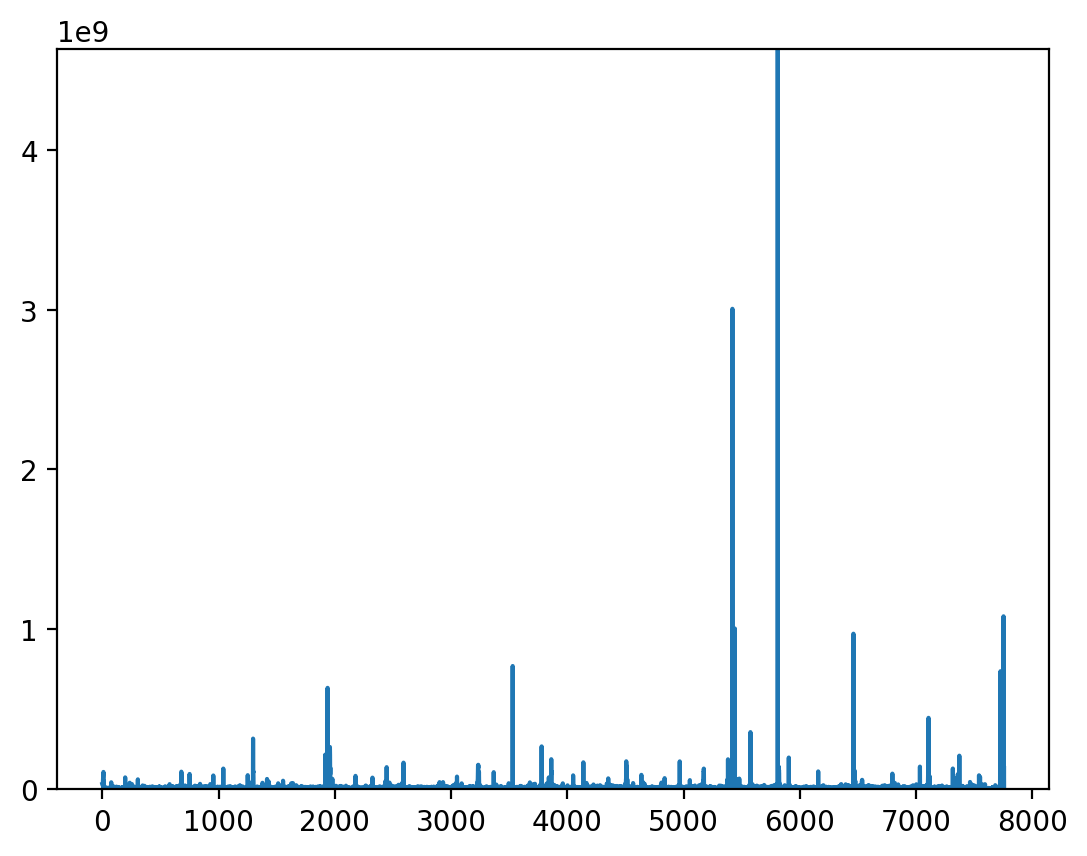

In [139]:
#to enhanse the quality of the graph
%config InlineBackend.figure_format = 'retina'

#max and min value range of y axis
plt.ylim(0.00, max_value)


#plotting of the graph
plt.plot(grouped_df.index,grouped_df['SALEPRICE'])

In [140]:
grouped_df.head(50)

,SALEDATE,SALEPRICE
0,01/01/1990,2.773971e+07
1,01/01/1991,2.542065e+07
2,01/01/1992,2.256761e+07
3,01/01/1993,2.357300e+07
4,01/01/1994,2.783119e+07
5,01/01/1995,3.729919e+07
6,01/01/1996,6.235582e+07
7,01/01/1997,6.748070e+07
8,01/01/1998,8.032760e+07
9,01/01/1999,9.606145e+07


In [141]:
grouped_df.tail(50)

,SALEDATE,SALEPRICE
7708,12/29/2010,1.024284e+06
7709,12/29/2011,2.282990e+06
7710,12/29/2012,3.345903e+05
7711,12/29/2013,1.280700e+04
7712,12/29/2014,1.200317e+06
7713,12/29/2015,2.468978e+06
7714,12/30/1991,7.000000e+04
7715,12/30/1993,1.000000e+00
7716,12/30/1994,2.371183e+04
7717,12/30/1996,2.085447e+05


In [142]:
grouped_df['SALEDATE']=pd.to_datetime(grouped_df['SALEDATE'])
grouped_df=grouped_df.set_index('SALEDATE')
resample_df=grouped_df.resample('Y').mean()
grouped_df1=resample_df.groupby(resample_df.index.year).mean()

In [143]:
grouped_df1.reset_index()


,SALEDATE,SALEPRICE
0,1990,1.031140e+07
1,1991,2.978182e+06
2,1992,2.579047e+06
3,1993,2.278707e+06
4,1994,2.252819e+06
5,1995,2.897638e+06
6,1996,3.947906e+06
7,1997,6.234550e+06
8,1998,6.841546e+06
9,1999,6.269937e+06
